## Violencia de Género en Monterrey
Data analysis about gender violence in Monterrey, Mexico using public data on reports to 911. All graphs where later publised at [violencia-genero-onrender.com](https://violencia-genero.onrender.com/) Data on reports was downloaded from [datos.monterrey.gob.mx](https://datos.monterrey.gob.mx/dataset/reportes-al-911-por-violencia-de-genero).



### 1. Import required libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import numpy as np

### 2. Upload data

##### 2.1 Gender violence citizen reports in Monterrey, Mexico from 2017 to september 2022. The "fecha" column has been previously cleaned to follow a parsable format.

In [103]:
violencia = pd.read_csv("violencia_genero_mty2.csv")

### 3. Clean data

##### 3.1 Replace error in value on column "estado".

In [104]:
violencia = violencia.replace(to_replace=['NUEVO LEON'], value='NL')

##### 3.2 Replace null values on column "estado".

In [105]:
violencia['estado'].fillna('NL', inplace = True)

##### 3.3 Replace null values on column "colonia".

In [106]:
violencia['colonia'].fillna('Sin nombre de colonia', inplace = True)

##### 3.4 Create new datetime column combining "fecha" and "hora_recepcion".

In [107]:
violencia["fecha_recepcion"] = violencia["fecha"] + " " + violencia["hora_recepcion"]

violencia["fecha_recepcion"] = pd.to_datetime(violencia["fecha_recepcion"], dayfirst = True)

del violencia["fecha"]
del violencia["hora_recepcion"]

##### 3.5 Drop unnecessary columns.

In [108]:
del violencia["municipio"]
del violencia["estado"]

##### 3.6 Clarify name values from "corporacion".

In [109]:
violencia["corporacion"] = violencia["corporacion"].replace("FZACIVIL", "Fuerza Civil")
violencia["corporacion"] = violencia["corporacion"].replace("PMON", "Policía de Monterrey")
violencia["corporacion"] = violencia["corporacion"].replace("GCIVIL", "Guardia Civil")
violencia["corporacion"] = violencia["corporacion"].replace("SVTM", "Secretaría de Vialidad y Tránsito")

##### 3.7 Clean values in "descripcion_cierre" y "via_recepcion".

In [110]:
violencia = violencia.replace({"descripcion_cierre" : {"Cierre De Fuga": "Cierre de fuga", "Remitido Al M.p.": "Remitido al Ministerio Público",
                                           "Fuera De Subzona": "Fuera de subzona", "Fuera De Entidad Federativa": "Fuera de Entidad Federativa"}})

violencia = violencia.replace({"via_recepcion" : {"Telefono": "Teléfono", "Sala crisis": "Sala de crisis", "App": "App 911",
                                                   "App 9-1-1": "App 911", "Whats App": "WhatsApp", "Cic": "CIC"}})

### 4. Visualize data

##### 4.1 Reports per year

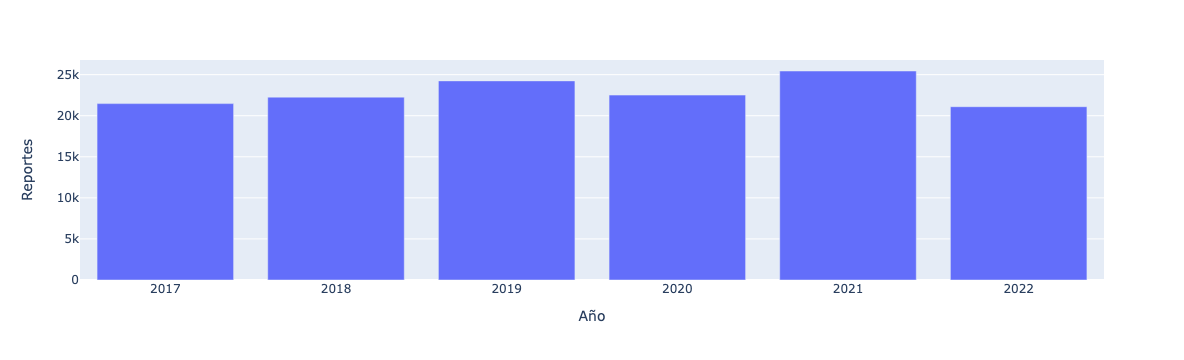

In [111]:
# Add new "year" column.
violencia["ano"] = violencia["fecha_recepcion"].dt.year

# Create dataframe from value counts on "year".
violencia_ano = pd.DataFrame(violencia["ano"].value_counts())
violencia_ano = violencia_ano.reset_index()
violencia_ano.columns = ['Año', 'Reportes']

# Graph.
violencia_ano = px.bar(violencia_ano, x="Año", y="Reportes")
violencia_ano.update_layout(yaxis={'categoryorder':'total ascending'})
violencia_ano.show()

##### 4.2 ¿On which month where most reports done?

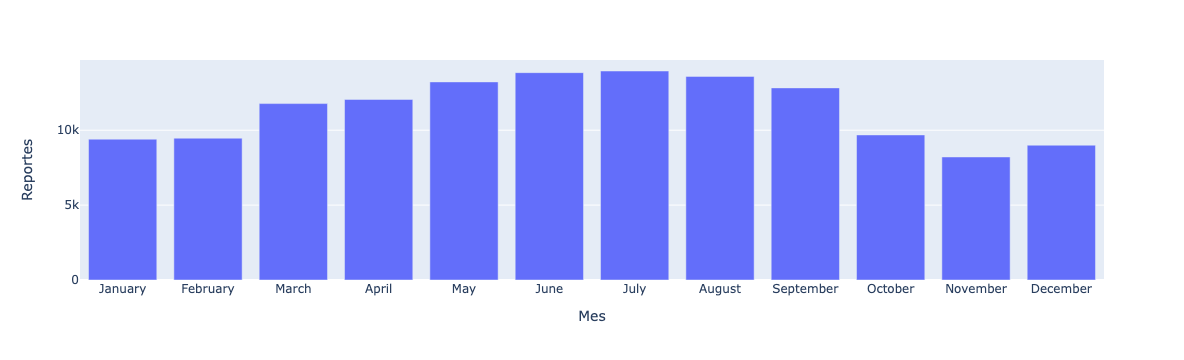

In [112]:
# Add new "month" column.
violencia["mes"] = violencia["fecha_recepcion"].dt.month_name()

# Create dataframe from value counts on "month".
violencia_mes = pd.DataFrame(violencia["mes"].value_counts())
violencia_mes = violencia_mes.reset_index()
violencia_mes.columns = ['Mes', 'Reportes']

# Sort by name of month.
meses = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
violencia_mes['Mes'] = pd.Categorical(violencia_mes['Mes'], categories=meses, ordered=True)
violencia_mes.sort_values(by='Mes',inplace=True)

# Graph.
violencia_mes = px.bar(violencia_mes, x="Mes", y="Reportes")
violencia_mes.update_layout(yaxis={'categoryorder':'total ascending'})
violencia_mes.show()

##### 4.3 Time of day with greater number of reports

In [113]:
# Add new "hour" and "day of week" column.
violencia["hora"] = violencia["fecha_recepcion"].dt.hour
violencia["dia_semana"] = violencia["fecha_recepcion"].dt.dayofweek

# Create pivot table. 
violencia["hora"] = violencia["hora"].apply(str)
violencia_diasemana = violencia.pivot_table(index = "hora", columns = "dia_semana", values = "numero_reporte", aggfunc = "count")
violencia_diasemana = violencia_diasemana.reset_index()

# Sort by hour of the day.
horas = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
violencia_diasemana['hora'] = pd.Categorical(violencia_diasemana['hora'], categories=horas, ordered=True)
violencia_diasemana.sort_values(by='hora',inplace=True)

violencia_diasemana = violencia_diasemana.set_index("hora")

# Graph.
#violencia_diasemana = px.imshow(violencia_diasemana)
#violencia_diasemana.update_xaxes(side="top")
#violencia_diasemana.show()
#violencia_diasemana.to_csv("violencia_diasemana.csv")
violencia_diasemana.to_csv("viol_dia.csv")

In [114]:
df = px.data.medals_wide(indexed=True)
df.to_csv("df.csv")
df

medal,gold,silver,bronze
nation,,,
South Korea,24,13,11
China,10,15,8
Canada,9,12,12


In [115]:
violencia_dia = pd.read_csv("violencia_dia.csv", index_col=0)

In [116]:
violencia_dia

,0,1,2,3,4,5,6
hora,,,,,,,
0,1850,1028,1005,1015,1119,1373,1826
1,1371,717,745,787,916,1152,1465
2,1025,493,560,607,671,1094,1325
3,655,343,401,428,460,907,1434
4,424,269,299,364,341,755,1493
5,344,219,257,262,286,566,1383
6,261,232,211,232,257,446,1162
7,319,285,291,283,307,435,904
8,382,335,315,348,330,381,744


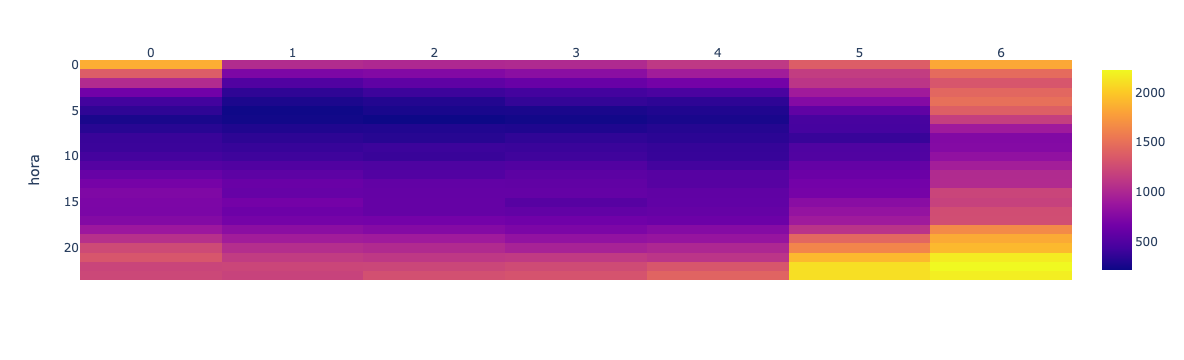

In [117]:
violencia_dia = px.imshow(violencia_dia)
violencia_dia.update_xaxes(side="top")
violencia_dia.show()

##### 4.4 Type of violence reported

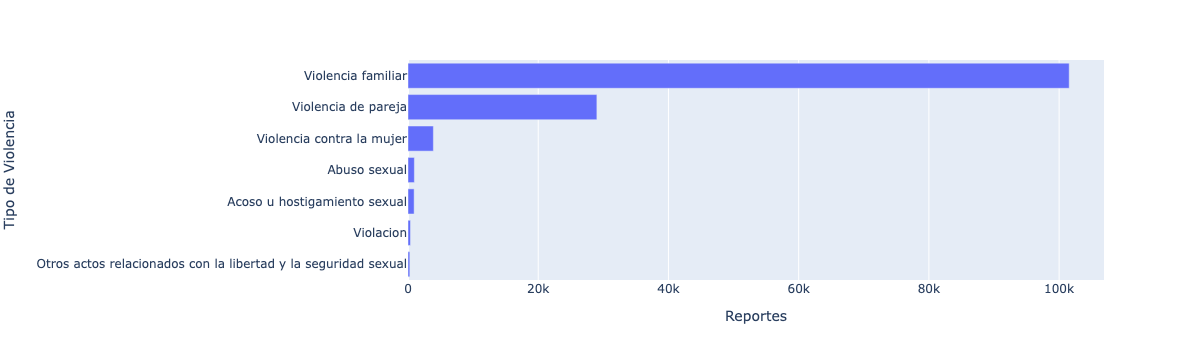

In [118]:
# Create dataframe from value counts on "descripcion_tipo".
violencia_tipo = pd.DataFrame(violencia["descripcion_tipo"].value_counts())
violencia_tipo = violencia_tipo.reset_index()
violencia_tipo.columns = ['Tipo de Violencia', 'Reportes']

# Graph.
violencia_tipo = px.bar(violencia_tipo, x='Reportes', y='Tipo de Violencia', orientation = "h")
violencia_tipo.update_layout(yaxis={'categoryorder':'total ascending'})
violencia_tipo.show()

##### 4.5 ¿Through which media was the report done?

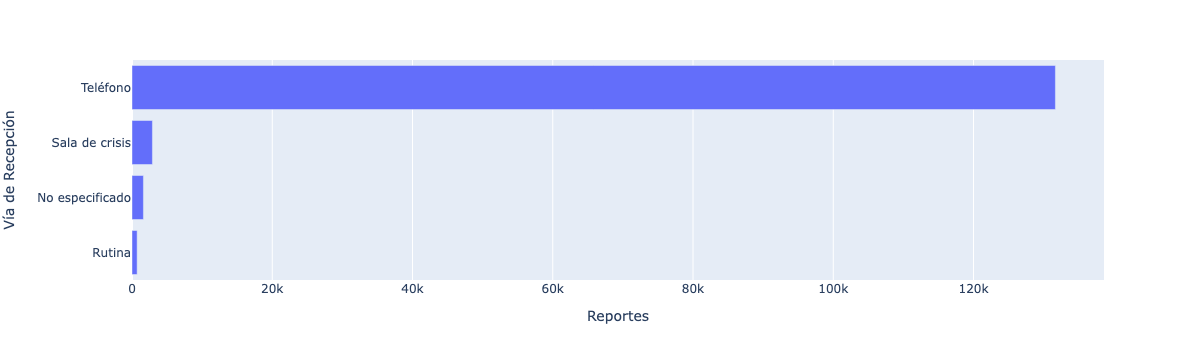

In [119]:
# Create dataframe from value counts on "via_recepcion". 
violencia_recepcion = pd.DataFrame(violencia["via_recepcion"].value_counts())

# Filter to top 4 most relevant results.
violencia_recepcion = violencia_recepcion[0:4]
violencia_recepcion = violencia_recepcion.reset_index()
violencia_recepcion.columns = ['Vía de Recepción', 'Reportes']

# Graph.
violencia_recepcion = px.bar(violencia_recepcion, x='Reportes', y='Vía de Recepción', orientation = "h")
violencia_recepcion.update_layout(yaxis={'categoryorder':'total ascending'})
violencia_recepcion.show()


##### 4.6 ¿Which agency attended the report?

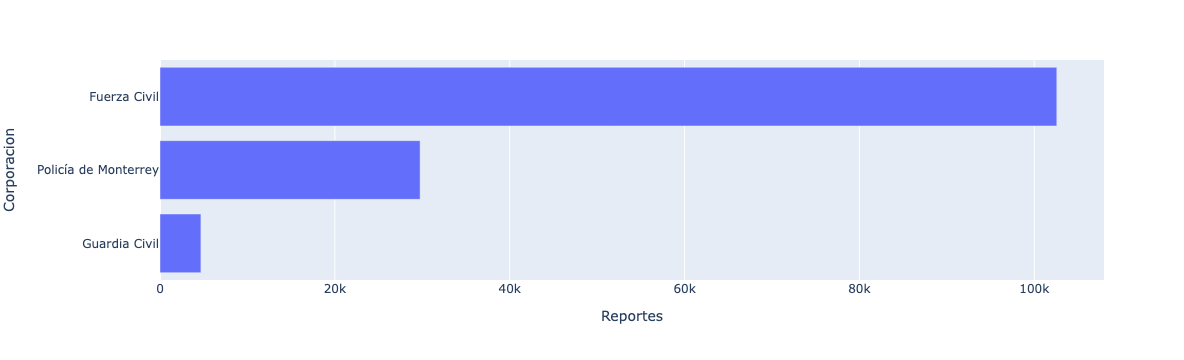

In [120]:
# Create dataframe from value counts on "corporacion".
violencia_corporacion = pd.DataFrame(violencia["corporacion"].value_counts())

# Remove Secretaría de Vialidad y Transito due to the small number of reports received.
violencia_corporacion = violencia_corporacion[0:3]
violencia_corporacion = violencia_corporacion.reset_index()
violencia_corporacion.columns = ['Corporacion', 'Reportes']

# Graph.
violencia_corporacion = px.bar(violencia_corporacion, x='Reportes', y='Corporacion', orientation = "h")
violencia_corporacion.update_layout(yaxis={'categoryorder':'total ascending'})
violencia_corporacion.show()

##### 4.7 ¿How was the report classified?

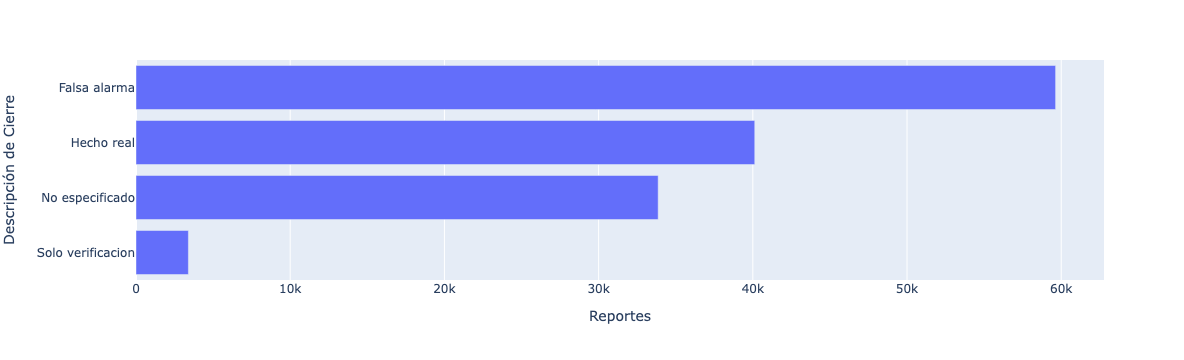

In [121]:
# Create dataframe from value counts on "descripcion_cierre".
violencia_cierre = pd.DataFrame(violencia["descripcion_cierre"].value_counts())

# Filter to top 4 most relevant results.
violencia_cierre = violencia_cierre[0:4]
violencia_cierre = violencia_cierre.reset_index()
violencia_cierre.columns = ['Descripción de Cierre', 'Reportes']

# Graph
violencia_cierre = px.bar(violencia_cierre, x='Reportes', y='Descripción de Cierre', orientation = "h")
violencia_cierre.update_layout(yaxis={'categoryorder':'total ascending'})
violencia_cierre.show()

##### 4.8 Top 10 neighborhoods by number of reports

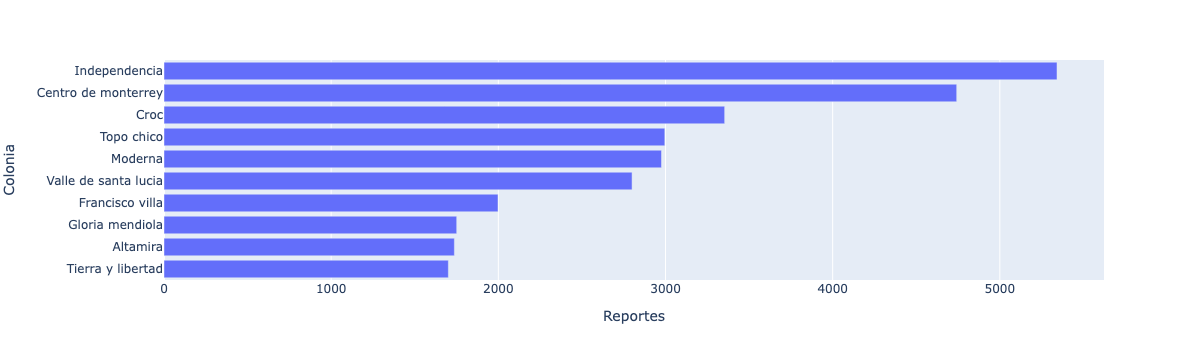

In [122]:
# Create dataframe from value counts on "colonia".
violencia_colonia = pd.DataFrame(violencia["colonia"].value_counts())
violencia_colonia = violencia_colonia[0:10]
violencia_colonia = violencia_colonia.reset_index()
violencia_colonia.columns = ['Colonia', 'Reportes']

# Graph
violencia_colonia = px.bar(violencia_colonia, x='Reportes', y='Colonia', orientation = "h")
violencia_colonia.update_layout(yaxis={'categoryorder':'total ascending'})
violencia_colonia.show()

##### 4.9 Map

In [124]:
# Delete reports not located in the Municipality of Monterrey with QGIS.
#violencia.to_csv("data/violencia_genero_mty3.csv")

# Upload reports located only in Monterrey.
violencia_map = pd.read_csv("violencia_map.csv")
del violencia_map["field_1"]

# Map.
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.density_mapbox(violencia_map, lat="latitud", lon="longitud", zoom=11, radius=2)
fig.show()